# **Detecting Fraudulent Credit Card Transactions Through Advanced Machine Learning Algorithms.**


# Module 1: Data Collection & Exploration

## Step 1: Load and Inspect the Data
#### This step ensures we correctly load the dataset and verify its structure.

In [2]:
import pandas as pd

# Define data types (set `unix_time` as float to avoid NA errors)
dtype_dict = {
    "cc_num": str,  
    "merchant": str,
    "category": str,
    "amt": float,
    "first": str,
    "last": str,
    "gender": str,
    "street": str,
    "city": str,
    "state": str,
    "zip": str,
    "lat": float,
    "long": float,
    "city_pop": float,
    "job": str,
    "dob": str,
    "trans_num": str,
    "unix_time": float,  # Changed to float to handle missing values
    "merch_lat": float,
    "merch_long": float,
    "is_fraud": float
}

# Load dataset with proper date parsing and data types
df = pd.read_csv("fraudTest.csv", dtype=dtype_dict, parse_dates=["trans_date_trans_time"], dayfirst=True, low_memory=False)

# Handle missing values
df["unix_time"] = df["unix_time"].fillna(0).astype(int)  # Fix chained assignment issue

# Display first few rows to verify
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.0,2020-06-21 12:14:00,2.29116E+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1.0,2020-06-21 12:14:00,3.57303E+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2.0,2020-06-21 12:14:00,3.59822E+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3.0,2020-06-21 12:15:00,3.59192E+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4.0,2020-06-21 12:15:00,3.52683E+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0


## Step 2: Check for Duplicates


#### Duplicate transactions can affect model accuracy.

In [9]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()


Number of duplicate rows: 553612


## Step 3: Summary Statistics
#### This helps understand numerical columns like amt (transaction amount).

In [11]:
# Display summary statistics
df.describe()

,Unnamed: 0,trans_date_trans_time,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2106.000000,2106,2106.000000,2106.000000,2106.000000,2.106000e+03,2.107000e+03,2106.000000,2106.000000,2106.000000
mean,1052.500000,2020-06-21 18:17:09.259259136,67.164060,38.332111,-89.919371,1.007443e+05,1.371188e+09,38.317728,-89.917705,0.005223
min,0.000000,2020-06-21 12:14:00,1.010000,20.027100,-155.369700,2.300000e+01,0.000000e+00,20.733607,-156.139388,0.000000
25%,526.250000,2020-06-21 15:11:15,8.700000,34.399525,-96.618400,8.280000e+02,1.371827e+09,34.443729,-96.588062,0.000000
50%,1052.500000,2020-06-21 18:10:00,33.600000,39.055750,-86.965700,3.224000e+03,1.371838e+09,39.143953,-87.242829,0.000000
75%,1578.750000,2020-06-21 21:19:45,75.997500,41.687575,-80.283750,2.797100e+04,1.371850e+09,41.898281,-80.310708,0.000000
max,2105.000000,2020-06-22 00:50:00,3204.980000,48.887800,-67.950300,2.906700e+06,1.371862e+09,49.681365,-67.254668,1.000000
std,608.094154,NaN,151.155122,5.023761,13.183700,3.351192e+05,2.988621e+07,5.052673,13.202699,0.072100


##### ✅ Insights Gained:

##### Min, Max, Mean, and Standard Deviation for amt, city_pop, etc.
##### Detects outliers in transaction amounts.

## Step 4: Fraud Distribution Check
#### Check how many fraud cases exist to handle class imbalance later.

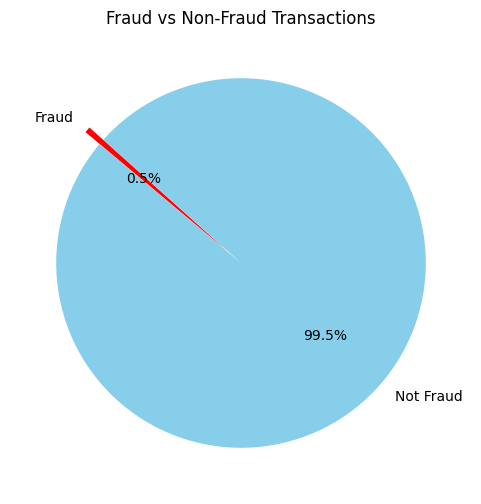

In [16]:
import matplotlib.pyplot as plt

# Fraud count
fraud_counts = df["is_fraud"].value_counts()

# Define labels and colors
labels = ["Not Fraud", "Fraud"]
colors = ["skyblue", "red"]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, explode=(0, 0.1))
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [18]:
# A pie chart makes it easy to visualize the proportion of fraud vs non-fraud transactions

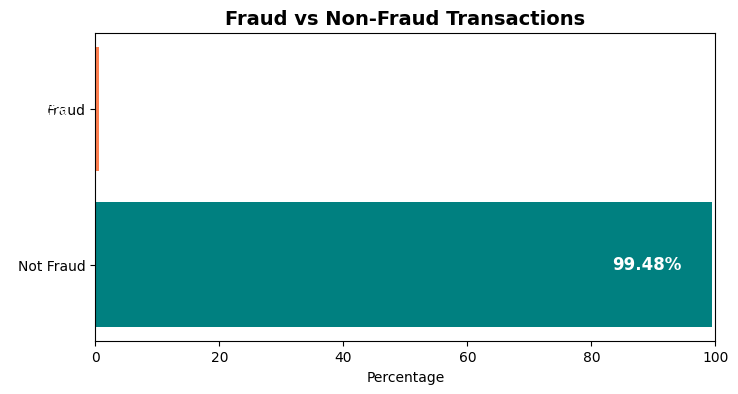

In [21]:
import matplotlib.pyplot as plt

# Fraud count
fraud_counts = df["is_fraud"].value_counts()

# Convert to percentage
fraud_percentage = (fraud_counts / fraud_counts.sum()) * 100

# Define custom colors (Teal & Orange)
colors = ["#008080", "#FF7F50"]  # Teal for Not Fraud, Coral for Fraud

# Create horizontal bar chart
plt.figure(figsize=(8, 4))
bars = plt.barh(["Not Fraud", "Fraud"], fraud_percentage, color=colors)

# Add percentage labels inside the bars
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}%", 
             va="center", ha="right", fontsize=12, fontweight="bold", color="white")

# Labels and title
plt.xlabel("Percentage")
plt.title("Fraud vs Non-Fraud Transactions", fontsize=14, fontweight="bold")
plt.xlim(0, 100)  # Set x-axis limit to 100% for clarity

plt.show()


## Step 5: Checking Missing Values
#### Even if .info() showed no missing values, let's double-check.

In [22]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Unnamed: 0               1
trans_date_trans_time    1
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                0
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


## Step 6: Data Type Conversion
#### Some columns need conversions:

##### Dates: Convert trans_date_trans_time and dob to DateTime.
##### Categorical Columns: Convert merchant, category, job, etc., to categorical format

In [26]:
# Convert date columns to DateTime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
# Convert 'dob' to datetime with explicit format
df['dob'] = pd.to_datetime(df['dob'], format="%d-%m-%Y", dayfirst=True, errors='coerce')

# Convert categorical columns
categorical_cols = ['merchant', 'category', 'gender', 'job', 'city', 'state']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("Data types after conversion:\n", df.dtypes)


Data types after conversion:
 Unnamed: 0                      float64
trans_date_trans_time    datetime64[ns]
cc_num                           object
merchant                       category
category                       category
amt                             float64
first                            object
last                             object
gender                         category
street                           object
city                           category
state                          category
zip                              object
lat                             float64
long                            float64
city_pop                        float64
job                            category
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                        float64
dtype: object


In [27]:
# Converts dates to proper format.
# Reduces memory usage by converting categorical data.


## Step 7: Merchant Category Fraud Analysis
#### Which categories have the most fraud cases?

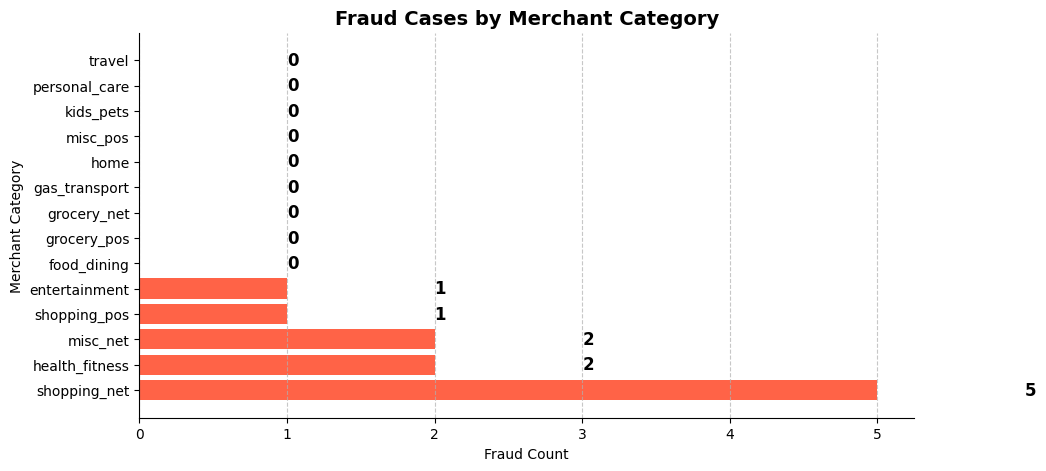

In [36]:
# Count fraud cases per category
fraud_by_category = df[df["is_fraud"] == 1]["category"].value_counts()

# Create horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(fraud_by_category.index, fraud_by_category.values, color="tomato")

# Add labels
for index, value in enumerate(fraud_by_category.values):
    plt.text(value + 1, index, str(value), va="center", fontsize=12, fontweight="bold")

# Titles and labels
plt.title("Fraud Cases by Merchant Category", fontsize=14, fontweight="bold")
plt.xlabel("Fraud Count")
plt.ylabel("Merchant Category")

# Clean up grid and spines
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()


In [38]:
# This horizontal bar chart visualizes fraud cases by merchant category, with longer bars indicating higher fraud occurrences. 
#The labels on bars show exact fraud counts, helping identify high-risk merchant types. 

# 🔹 Module 2: Data Preprocessing
### Steps in This Module
### Handling Missing Values
### Removing Irrelevant Columns
### Feature Engineering
### Encoding Categorical Data
### Feature Scaling
### Handling Class Imbalance
### Splitting Data for Training & Testing


###### 📜 Explanation of Each Library
###### 1️⃣ pandas → For handling and preprocessing tabular data.
###### 2️⃣ numpy → For numerical operations & array manipulations.
###### 3️⃣ scikit-learn (sklearn) → For data preprocessing (scaling, encoding, train-test split, etc.).
###### 4️⃣ imbalanced-learn (imblearn) → For handling class imbalance using SMOTE.

## Step 1: Handling Missing Values
#### We already checked for missing values in Module 1, but now we need to handle them properly.

In [43]:
# Check missing values again
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Dropping columns with too many missing values (if any)
df = df.dropna()

# Verify that there are no missing values left
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values per column:
 Unnamed: 0               1
trans_date_trans_time    1
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                0
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

Missing values after cleaning:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state   

## Step 2: Removing Irrelevant Columns
### Some columns don't contribute to fraud detection, such as:

##### Unnamed: 0 (Index column)
##### first, last, street, zip (Personal data not useful for fraud detection)
##### cc_num, trans_num (Unique identifiers, not predictive)

In [44]:
# Dropping unnecessary columns
drop_cols = ["Unnamed: 0", "first", "last", "street", "zip", "cc_num", "trans_num"]
df = df.drop(columns=drop_cols)

# Check remaining columns
print("Columns after removal:\n", df.columns)


Columns after removal:
 Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


### Reduces data complexity by keeping only relevant features.

## Step 3: Feature Engineering
#### 1️⃣ Extract Date & Time Features
#### Fraud trends may vary by hour, day, or month.

In [45]:
# Extract new date-time features
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_weekday'] = df['trans_date_trans_time'].dt.weekday  # 0 = Monday, 6 = Sunday

# Drop original datetime column
df = df.drop(columns=["trans_date_trans_time"])

# Display new features
df[['trans_hour', 'trans_day', 'trans_month', 'trans_weekday']].head()


,trans_hour,trans_day,trans_month,trans_weekday
0,12,21,6,6
1,12,21,6,6
2,12,21,6,6
3,12,21,6,6
4,12,21,6,6


In [46]:
# Adds useful features like hour of transaction (fraud happens more at night!).


## Step 4: Encoding Categorical Data
#### 1️⃣ One-Hot Encoding for Nominal Categories
#### Columns like merchant, category, job, city, and state need encoding.

In [48]:
# Encoding categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['merchant', 'category', 'gender', 'job', 'city', 'state'], drop_first=True)

# Check updated dataset
print("Shape after encoding:", df.shape)
df.head()


Shape after encoding: (2106, 1713)


,amt,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_hour,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,2.86,33.9659,-80.9355,333497.0,1968-03-19,1371816865,33.986391,-81.200714,0.0,12,...,False,False,False,False,False,False,False,False,False,False
1,29.84,40.3207,-110.4360,302.0,1990-01-17,1371816873,39.450498,-109.960431,0.0,12,...,False,False,False,True,False,False,False,False,False,False
2,41.28,40.6729,-73.5365,34496.0,1970-10-21,1371816893,40.495810,-74.196111,0.0,12,...,False,False,False,False,False,False,False,False,False,False
3,60.05,28.5697,-80.8191,54767.0,1987-07-25,1371816915,28.812398,-80.883061,0.0,12,...,False,False,False,False,False,False,False,False,False,False
4,3.19,44.2529,-85.0170,1126.0,1955-07-06,1371816917,44.959148,-85.884734,0.0,12,...,False,False,False,False,False,False,False,False,False,False


### Converts categorical data into numerical format for ML models.

## Step 5: Feature Scaling
#### Some features (e.g., amt, city_pop, lat/long) have different scales.
#### StandardScaler is used for normalization.

In [49]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
num_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']

# Apply Standard Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display scaled features
df[num_cols].head()


,amt,city_pop,lat,long,merch_lat,merch_long
0,-0.425519,0.694702,-0.869318,0.681600,-0.857440,0.660400
1,-0.246984,-0.299792,0.395931,-1.556581,0.224245,-1.518439
2,-0.171282,-0.197733,0.466054,1.242956,0.431178,1.191069
3,-0.047076,-0.137229,-1.943709,0.690431,-1.881695,0.684465
4,-0.423335,-0.297333,1.178837,0.371939,1.314749,0.305538


### Standardizes numerical data for better ML performance.

## Step 6: Handling Class Imbalance
#### Fraud cases are much fewer than normal transactions, which can bias models.
#### We use SMOTE (Synthetic Minority Over-sampling Technique) to balance fraud cases.

In [53]:
from imblearn.over_sampling import SMOTE

# Check available columns
print("Dataset Columns:", df.columns)

# Drop datetime columns only if they exist
columns_to_drop = [col for col in ['is_fraud', 'trans_date_trans_time', 'dob'] if col in df.columns]

# Define X (features) and y (target)
X = df.drop(columns=columns_to_drop)
y = df['is_fraud']

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class balance after SMOTE
print("Class distribution after SMOTE:\n", y_resampled.value_counts())


Dataset Columns: Index(['amt', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour',
       ...
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=1713)
Class distribution after SMOTE:
 is_fraud
0.0    2095
1.0    1047
Name: count, dtype: int64


#### Generates synthetic fraud cases to balance dataset.

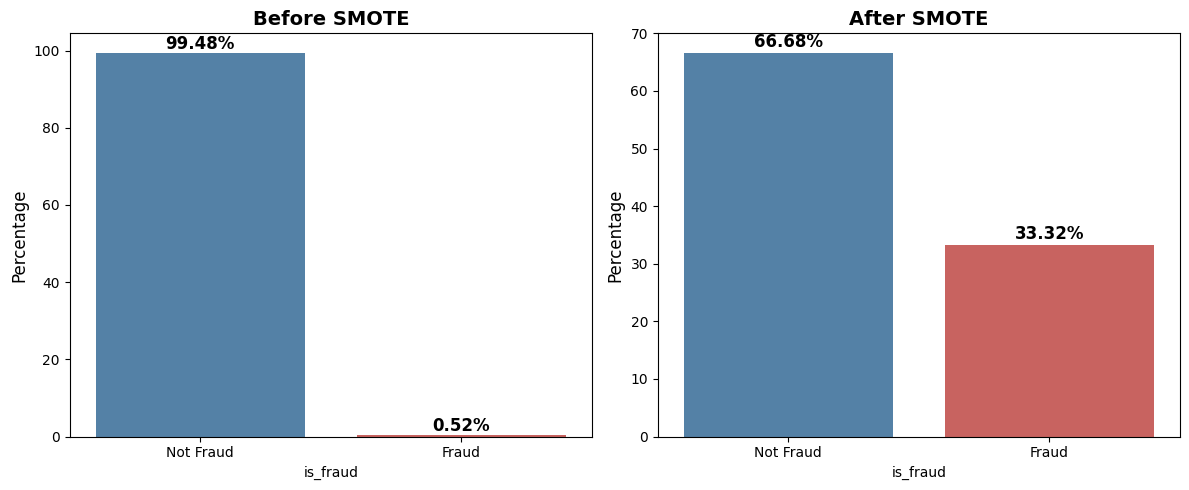

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Drop datetime columns if they exist
columns_to_drop = [col for col in ['is_fraud', 'trans_date_trans_time', 'dob'] if col in df.columns]

# Define X (features) and y (target)
X = df.drop(columns=columns_to_drop)
y = df['is_fraud']

# Count original fraud distribution
original_counts = y.value_counts(normalize=True) * 100  # Convert to percentage

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count new fraud distribution after SMOTE
smote_counts = y_resampled.value_counts(normalize=True) * 100  # Convert to percentage

# Define figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Custom colors
colors = {0: "#4682B4", 1: "#D9534F"}  # Blue for Not Fraud, Red for Fraud

# Before SMOTE
sns.barplot(x=original_counts.index, y=original_counts.values, hue=original_counts.index, dodge=False, 
            palette=colors, ax=axes[0], legend=False)
axes[0].set_title("Before SMOTE", fontsize=14, fontweight="bold")
axes[0].set_xticks([0, 1])  # Set tick positions
axes[0].set_xticklabels(["Not Fraud", "Fraud"])
axes[0].set_ylabel("Percentage", fontsize=12)

# Add percentage labels
for i, v in enumerate(original_counts.values):
    axes[0].text(i, v + 1, f"{v:.2f}%", ha="center", fontsize=12, fontweight="bold")

# After SMOTE
sns.barplot(x=smote_counts.index, y=smote_counts.values, hue=smote_counts.index, dodge=False, 
            palette=colors, ax=axes[1], legend=False)
axes[1].set_title("After SMOTE", fontsize=14, fontweight="bold")
axes[1].set_xticks([0, 1])  # Set tick positions
axes[1].set_xticklabels(["Not Fraud", "Fraud"])
axes[1].set_ylabel("Percentage", fontsize=12)

# Add percentage labels
for i, v in enumerate(smote_counts.values):
    axes[1].text(i, v + 1, f"{v:.2f}%", ha="center", fontsize=12, fontweight="bold")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


## 🔍 What is SMOTE & Why is it Useful?
#### SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to balance imbalanced datasets by generating synthetic samples for the minority class (e.g., fraud cases).

### 🚀 Why Do We Need SMOTE?   
##### In fraud detection, fraud cases are much fewer than normal transactions.
##### If we train a model on an imbalanced dataset, it may favor the majority class (non-fraud) and fail to detect fraud.
##### SMOTE creates synthetic (not duplicated) fraud cases, making the dataset more balanced and improving model performance.    

#### ⚙️ How SMOTE Works?    
##### 1️⃣ Identifies minority class samples (e.g., fraud cases).    
##### 2️⃣ Finds nearest neighbors of these fraud samples.    
##### 3️⃣ Creates synthetic data points by interpolating between existing fraud samples.    
##### 4️⃣ Balances fraud & non-fraud cases, improving model accuracy.     
  
#### ✅ Benefits of Using SMOTE
##### ✔ Prevents model bias towards the majority class.    
##### ✔ Improves fraud detection rates without just duplicating data.    
##### ✔ Works better than random oversampling, which simply copies existing fraud cases.    
##### ✔ Helps machine learning models learn better patterns for fraud detection.    

#### 💡 Example  
##### Before SMOTE: 99% non-fraud, 1% fraud → Model predicts almost all transactions as non-fraud.   
##### After SMOTE: 66% non-fraud, 33% fraud → Model learns better fraud patterns and detects fraud more accurately.  

## Step 7: Splitting Data for Training & Testing
#### We split data into 80% training & 20% testing.

In [57]:
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Verify split sizes
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (2513, 1711), Testing Data: (629, 1711)


### Prepares data for ML model training.


### Save Processed Data to a CSV File



In [59]:
df.to_csv("processed_fraud_data.csv", index=False)  # Saves data without index
